In [3]:
import geopandas as gpd
import contextily as cx
import os

In [53]:
category = 'Waterbody information for 70 river reaches and 2 reservoirs'
fn = 'study_stream_reaches/study_stream_reaches.shp'
fn = 'study_reservoirs/study_reservoirs.shp'
table_loc = os.path.join('.', 'data', category, fn) 
df = gpd.read_file(table_loc)
df.head(10)

,site_id,geometry
0,nhdhr_151957878,"POLYGON ((-74.67705 42.12389, -74.67705 42.123..."
1,nhdhr_120022743,"POLYGON ((-75.28605 42.15987, -75.28607 42.159..."


In [54]:
df[df['subsegid'].str[-2:]=='_2']

KeyError: 'subsegid'

In [ ]:
print(len(df))
print(len(df['segidnat'].unique()))
print(df['segidnat'].isna().sum())
df[df['segidnat'].isna()]

70
70
0


,subsegid,subsegseg,subseglen,fromsegs,toseg,tosubseg,segidnat,geometry


In [ ]:
df[df['subsegid']=='51_1']

,subsegid,subsegseg,subseglen,fromsegs,toseg,tosubseg,segidnat,geometry


In [ ]:
display(df.dtypes)

subsegid       object
subsegseg       int64
subseglen     float64
fromsegs       object
toseg           int64
tosubseg       object
segidnat        int64
geometry     geometry
dtype: object

In [ ]:
df.sort_values('fishdist').head()

KeyError: 'fishdist'

In [ ]:
col = 'subsegseg'

def check_whitespace(df, col):
    unique_vals = df[col].unique()
    for st in unique_vals:
        if st==None:
            continue
        if st.startswith(' '):
            print(f'    bad string ({st})')
        if st.endswith(' '):
            print(f'    bad string ({st})')   

def calc_metrics(df, col):
    print(f'    min: {df[col].min()}')
    print(f'    mean: {df[col].mean()}')
    print(f'    max: {df[col].max()}')

# Data do not have leading/trailing spaces or tabs.
print(f'checking column {col}')
# if type is string, check for whitespace
if df.dtypes[col]=='O':
    print(f'unique values ({len(df[col].unique())}): {df[col].unique()}')
    check_whitespace(df, col)
# if type is float, check min, max, mean
elif df.dtypes[col]=='float64':
    calc_metrics(df, col)
elif df.dtypes[col]=='int64':
    calc_metrics(df, col)

checking column subsegseg
    min: 1
    mean: 94.84285714285714
    max: 218


In [ ]:
df_wm = df.to_crs(epsg=3857)

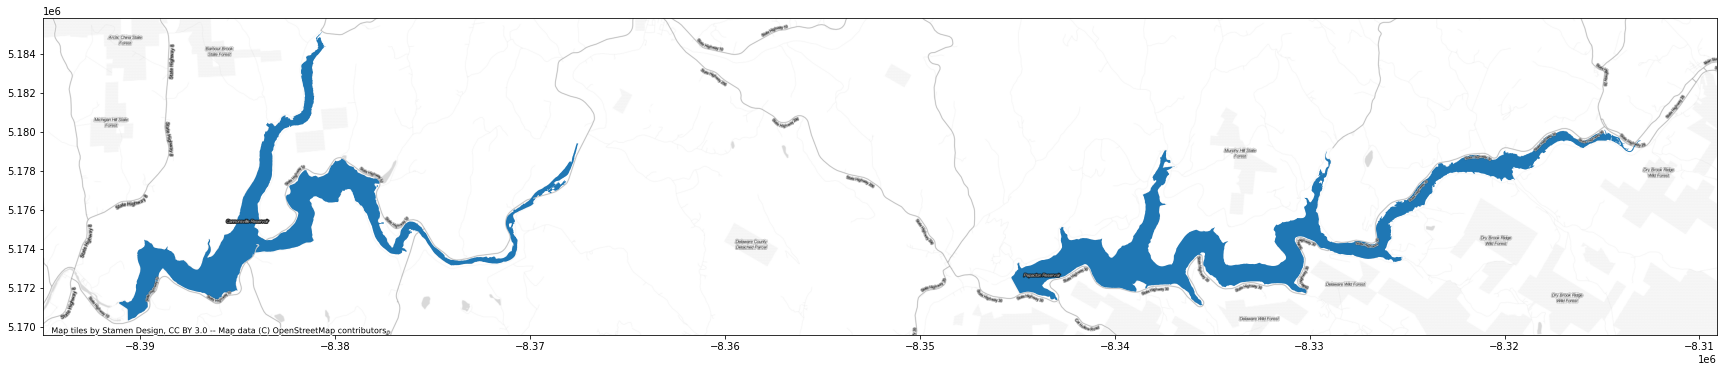

In [ ]:
ax = df_wm.plot(figsize=(30, 30))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)